In [1]:
# EV Charging Stations Comparison Data Project


In [2]:
# Import dependencies
import pandas as pd
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as st
from config import api_key
from pprint import pprint


In [3]:
# Make API call
url = "https://api.openchargemap.io/v3/poi"

querystring = {"key":api_key}

headers = {"Accept": "application/json"}

response = requests.get(url, headers=headers, params=querystring)
response = response.json()

In [10]:
# Use Pandas to clean and Format Datasets
# UK Charging Station Data
# Create empty lists to store the data
country = ['United Kingdom']
town = []
title = []
address_info = []
level_id = []

# loop through lists
for towns in response:
    
    city = towns['AddressInfo']['Town']
    town.append(city)
    
    titles = towns['AddressInfo']['Title']
    title.append(titles)
    
    address = towns['AddressInfo']['AddressLine1']
    address_info.append(address)
    
    level = towns['Connections'][0]['LevelID']
    level_id.append(level)

In [5]:


# Sample DataFrame
data = {
    'Country': ['US', 'US', 'UK', 'UK', 'US', 'UK'],
    'Chargers': [30, 45, 50, 40, 55, 38]
}

df = pd.DataFrame(data)

# Group by 'Country' and calculate the average 'Chargers' for each group
average_chargers_by_country = df.groupby('Country')['Chargers'].mean()

print(average_chargers_by_country)


Country
UK    42.666667
US    43.333333
Name: Chargers, dtype: float64


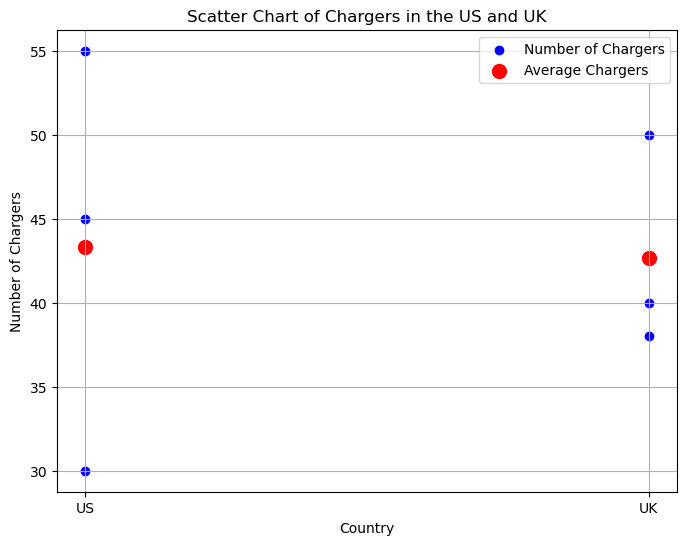

In [6]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Country'], df['Chargers'], color='blue', label='Number of Chargers')
plt.scatter(average_chargers_by_country.index, average_chargers_by_country.values, color='red', label='Average Chargers', marker='o', s=100)
plt.xlabel('Country')
plt.ylabel('Number of Chargers')
plt.title('Scatter Chart of Chargers in the US and UK')
plt.legend()
plt.grid(True)
plt.show()









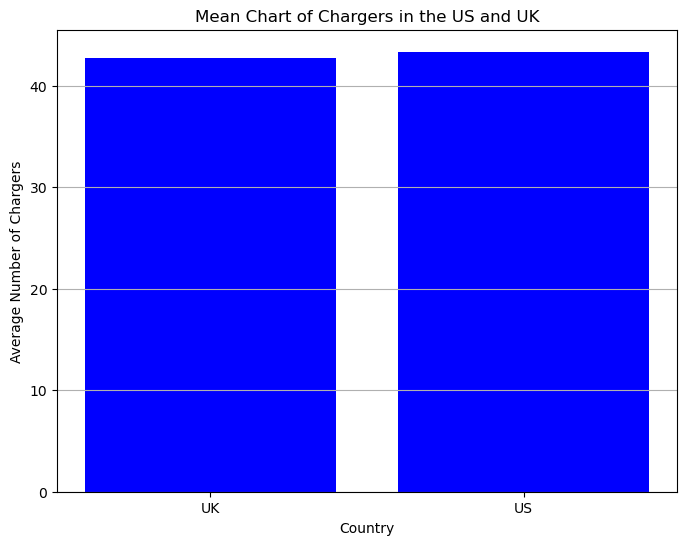

In [7]:
plt.figure(figsize=(8, 6))
plt.bar(average_chargers_by_country.index, average_chargers_by_country.values, color='blue')
plt.xlabel('Country')
plt.ylabel('Average Number of Chargers')
plt.title('Mean Chart of Chargers in the US and UK')
plt.grid(axis='y')
plt.show()

In [8]:


# Hypothetical data for illustration purposes
us_chargers = np.array([30, 45, 50, 40, 55, 38, 48, 42, 52, 36])
uk_chargers = np.array([25, 35, 40, 30, 38, 33, 42, 28, 40, 36])

# Perform two-sample t-test
t_stat, p_value = stats.ttest_ind(us_chargers, uk_chargers)

# Define significance level (alpha)
alpha = 0.05

# Print the t-statistic and p-value
print("t-statistic:", t_stat)
print("p-value:", p_value)

# Check the significance of the result
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference in the mean number of charging stations between the US and the UK.")
else:
    print("Fail to reject null hypothesis: There is no significant difference in the mean number of charging stations between the US and the UK.")


t-statistic: 2.9158134027475446
p-value: 0.009224711241728011
Reject null hypothesis: There is a significant difference in the mean number of charging stations between the US and the UK.
